# Ejemplo 02:
***Dr. Antonio Arista Jalife***
En este ejemplo vamos a tratar de reducir lo mas posible los colores y los espacios de color. Muchas veces el tener muchos colores no nos ayuda demasiado en las tareas de reconocimiento de objetos, y para ello vamos a tratar de reducir lo mas posible los colores de una imagen. 

Primero cargaremos una imagen

<class 'numpy.ndarray'>


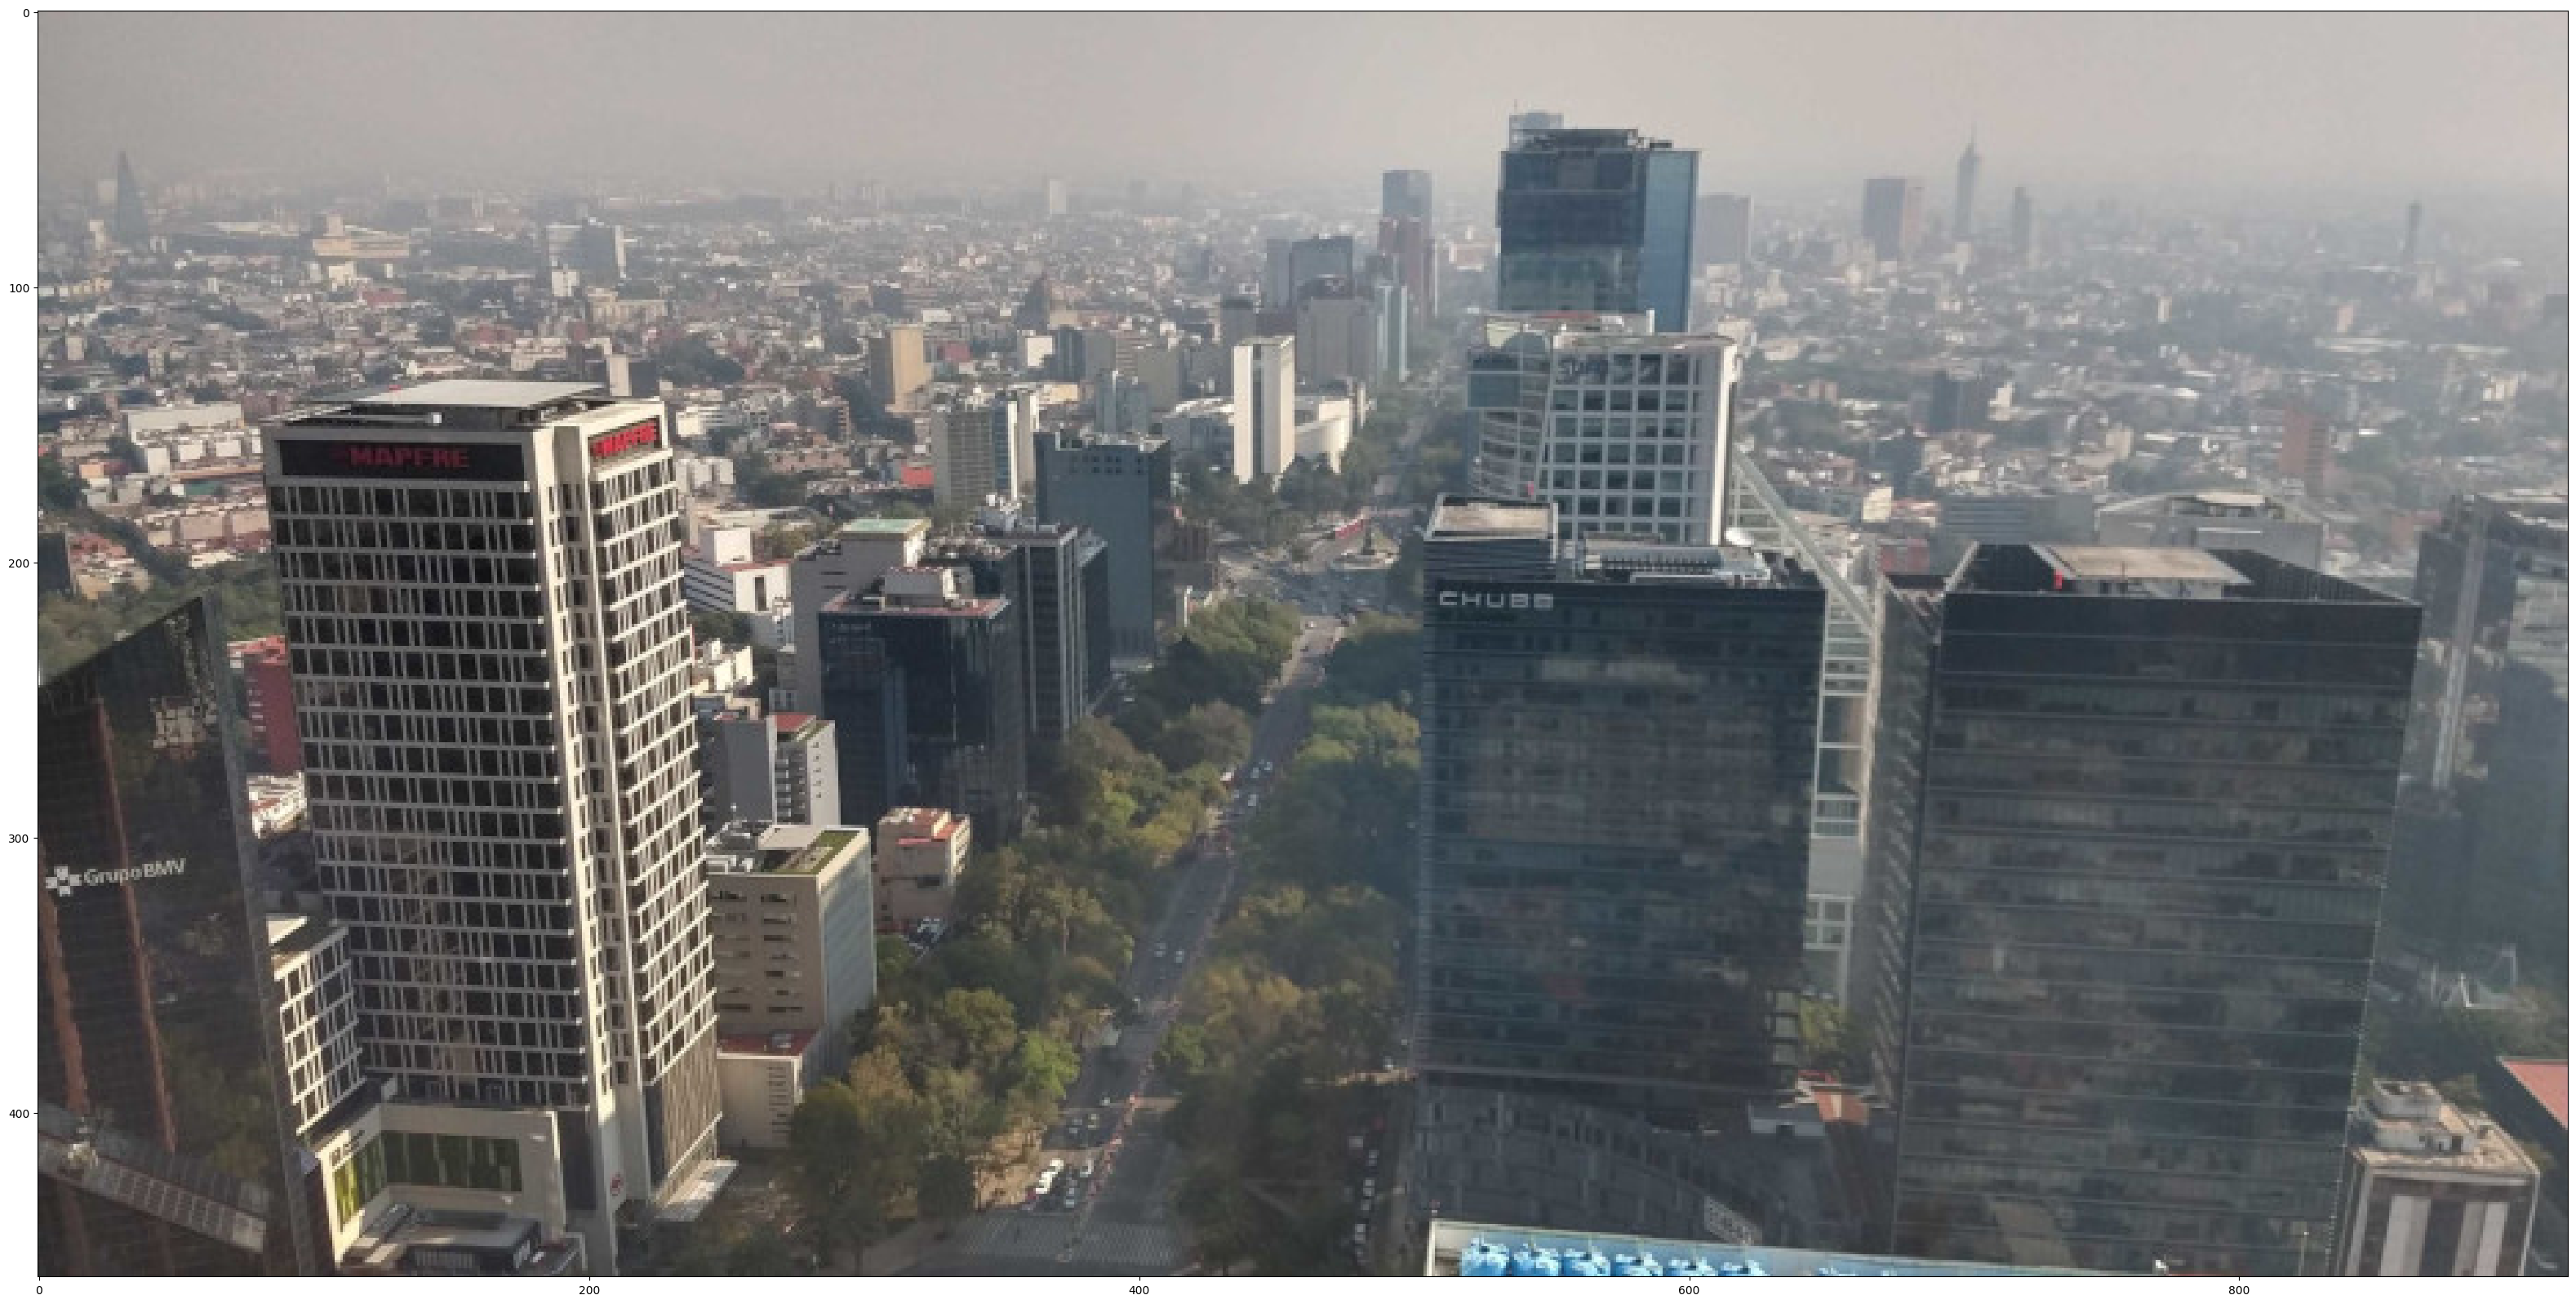

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imageOpenCV = cv2.imread("mexicocity.jpg", cv2.IMREAD_COLOR)
imagen = cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB)
print(type(imagen))
plt.figure(figsize=(40,40))
plt.imshow(imagen)

### Conversión a escala de grises.
Dado que vamos a trabajar muchas veces con imágenes en escala de grises, creemos una función que transforme a escala de grises una imagen. 

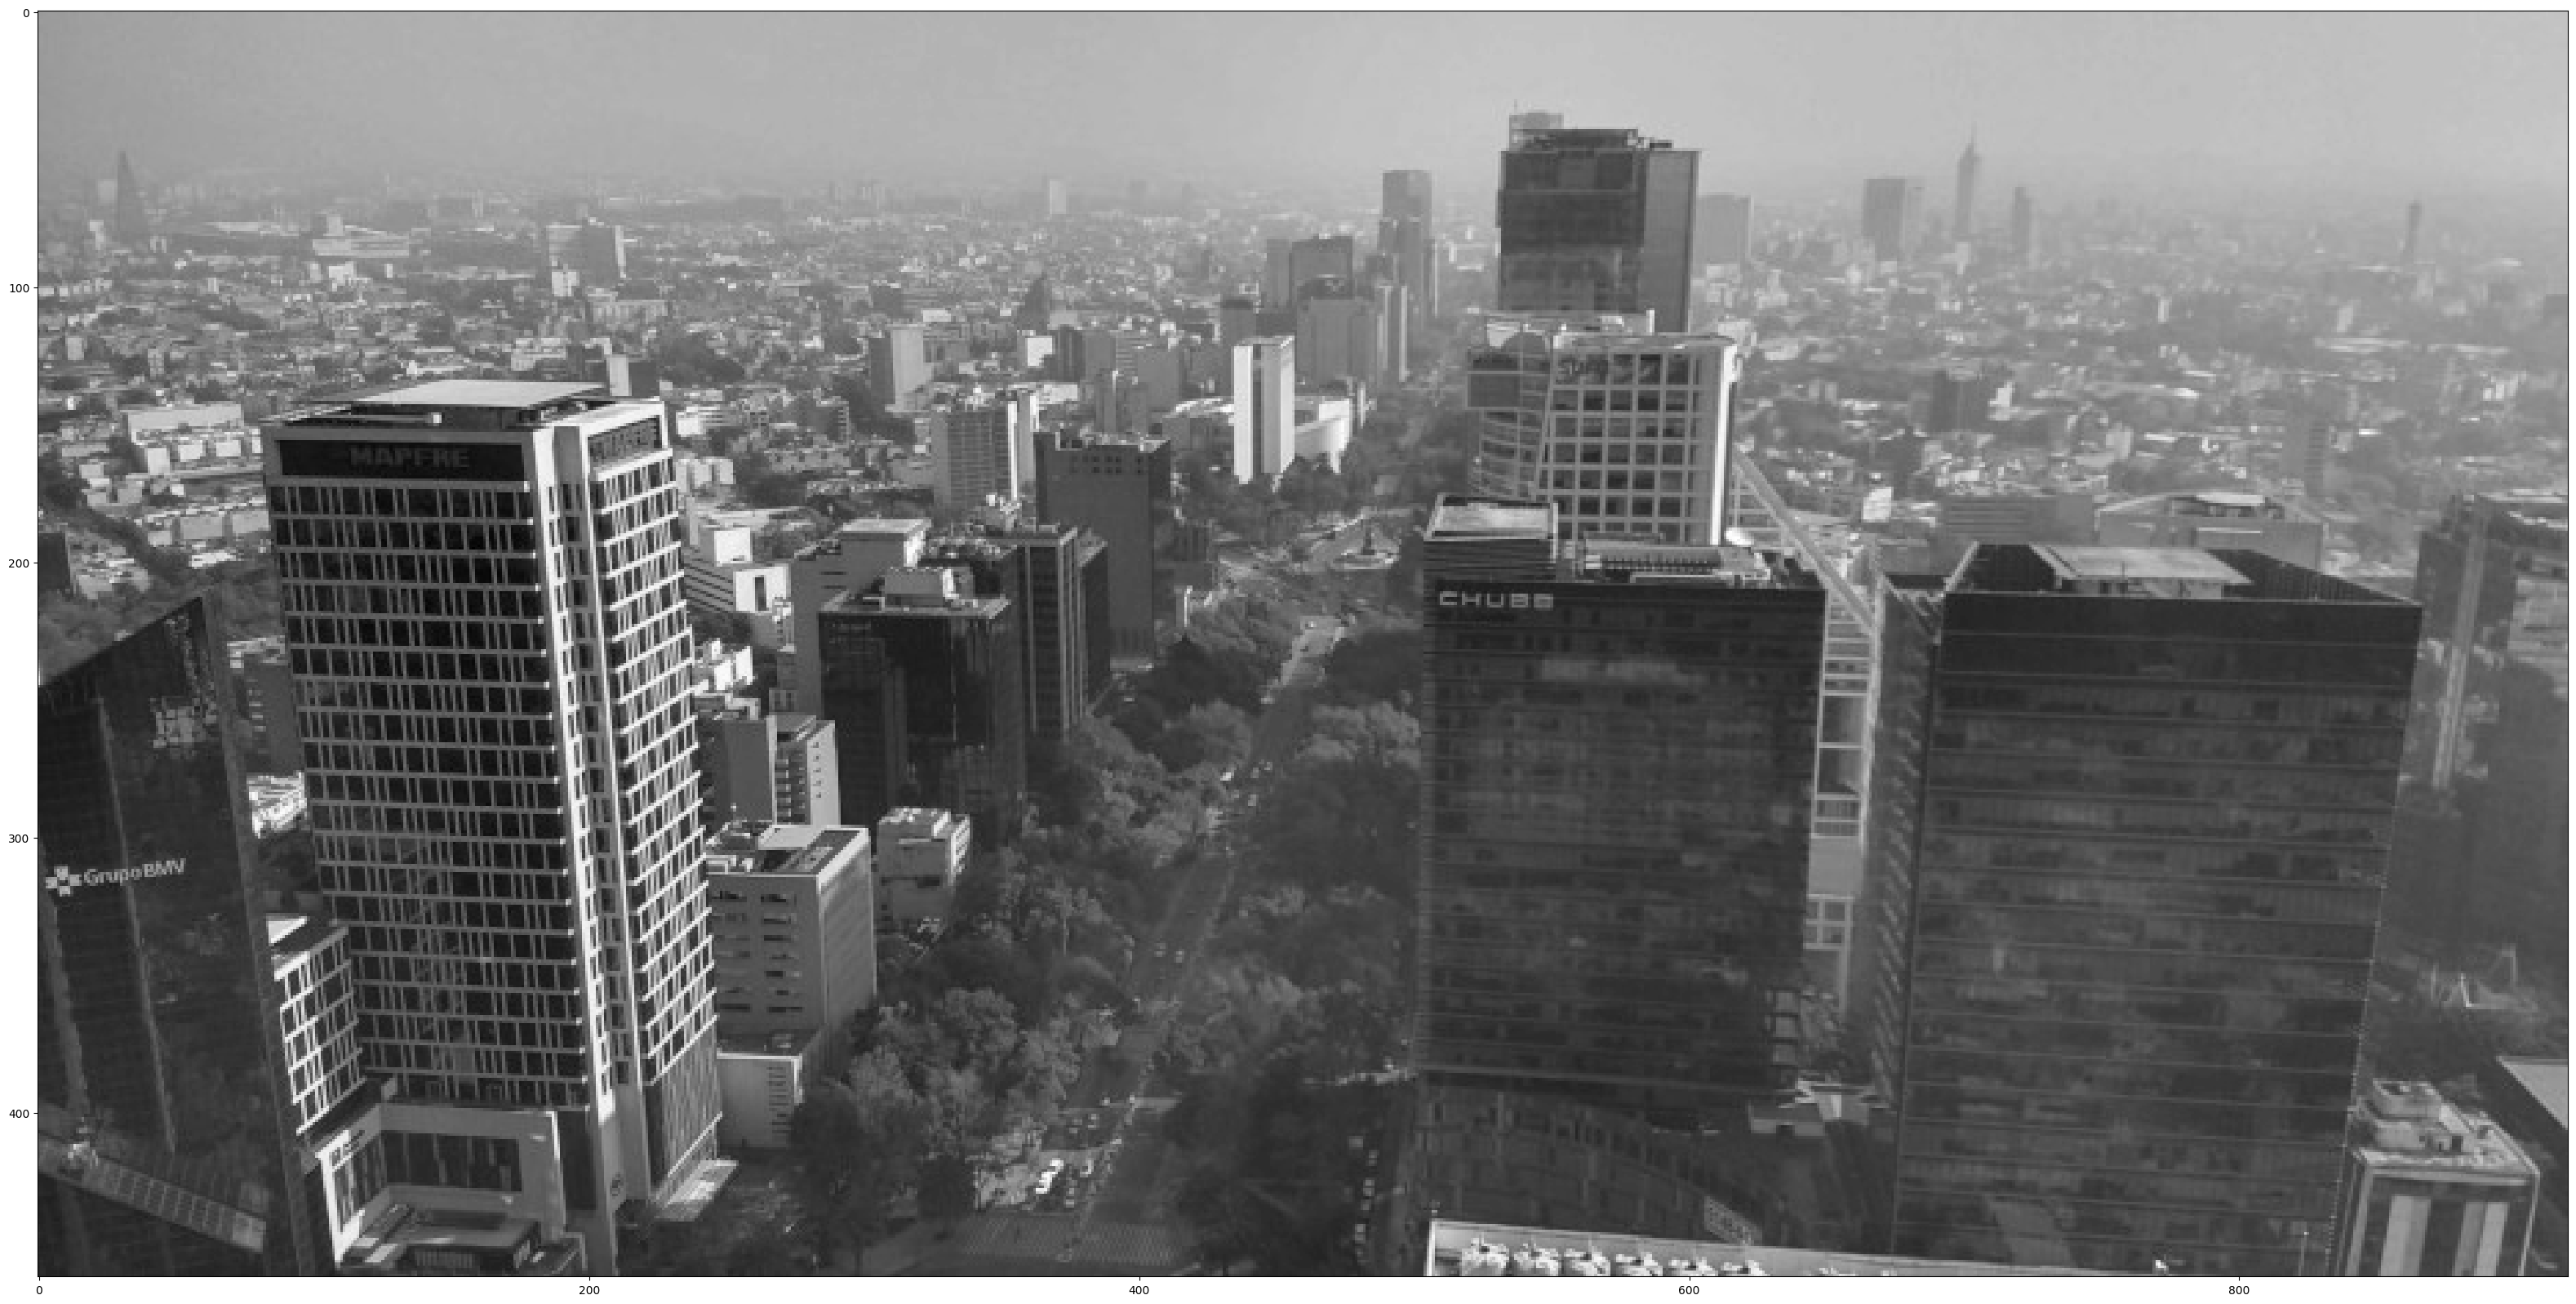

In [2]:
def convertirAGrayScale(imagen):
    imagenGris = np.sum(imagen, axis = 2) / 3    
    return imagenGris

imagenGris = convertirAGrayScale(imagen)
plt.figure(figsize=(40,40))
plt.imshow(imagenGris, cmap=plt.cm.gray)

### Binarización.
En ambientes controlados (como por ejemplo, la banda de productos de un supermercado) podrías detectar donde se encuentra cada producto en una imagen si binarizas la imagen: Binarizar consiste en forzar a que un pixel contenga uno de solo dos valores: 0(negro) o 255(blanco) dado cierto umbral (threshold ($Th$)).

Matemáticamente, podemos verlo como que a cada pixel $p$ de la imagen $(x,y)$ le corresponde:

$$
p(x,y) = \left\{
        \begin{array}{ll}
            0 & \quad x \leq Th \\
            255 & \quad x > Th
        \end{array}
    \right.
$$

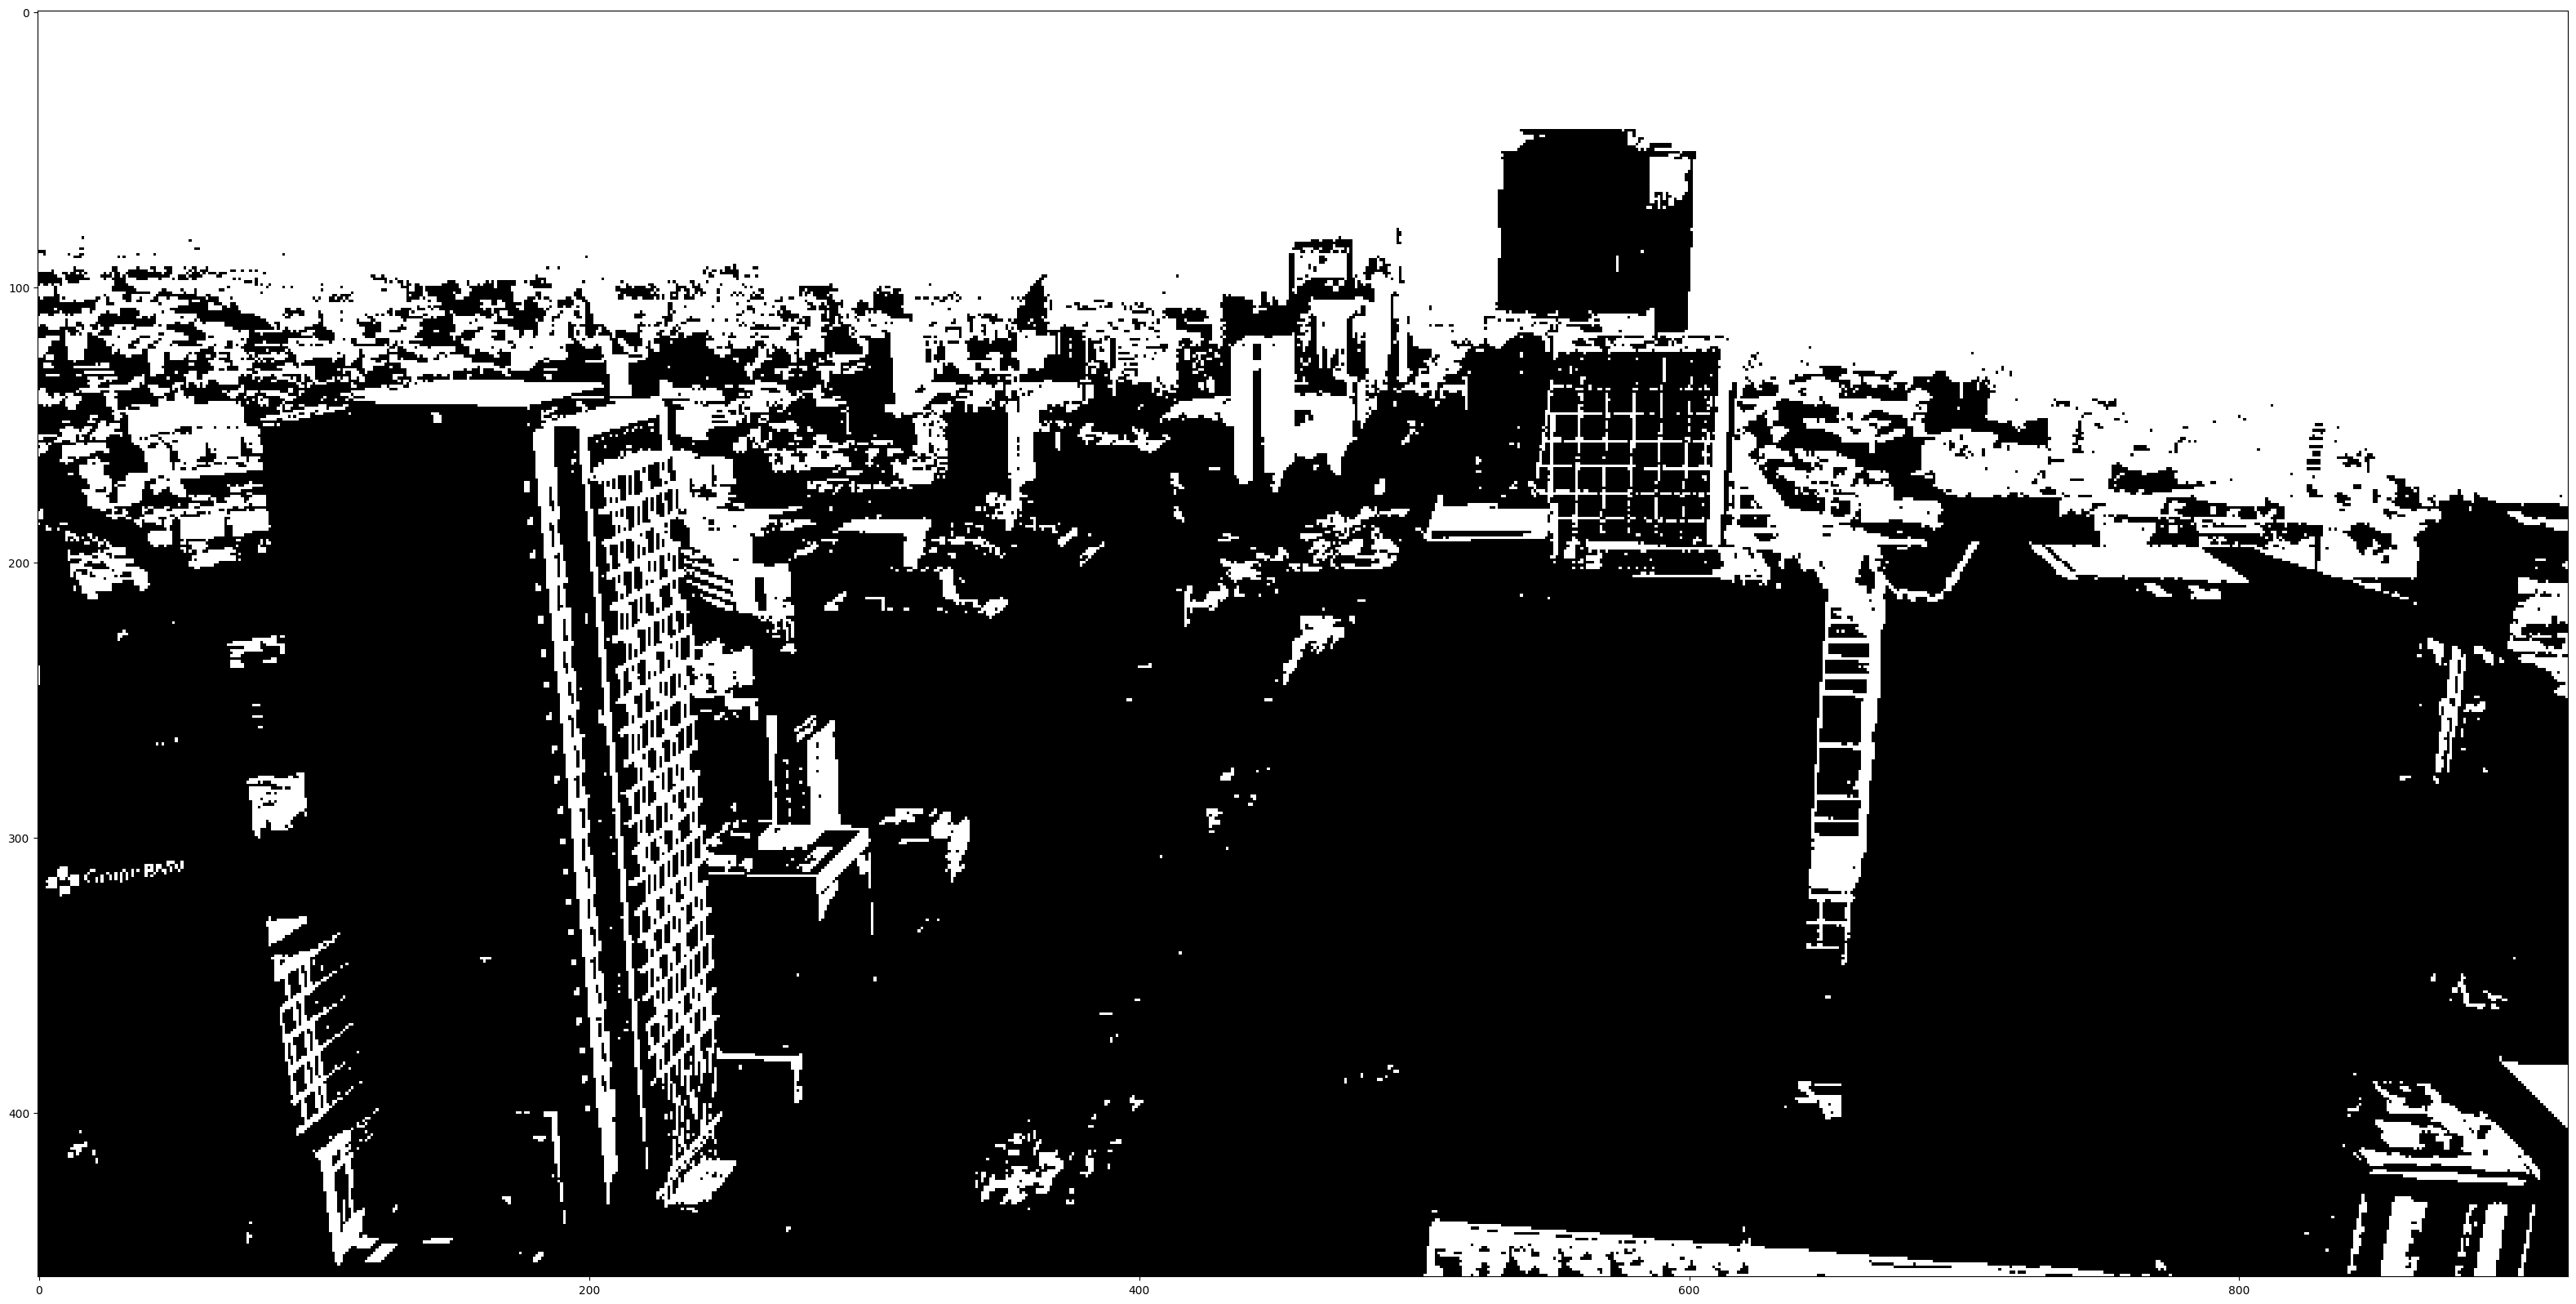

In [3]:
def binarizar(imagenGris, threshold):
    imgBinaria = np.where(imagenGris > threshold, 255, 0)
    return imgBinaria


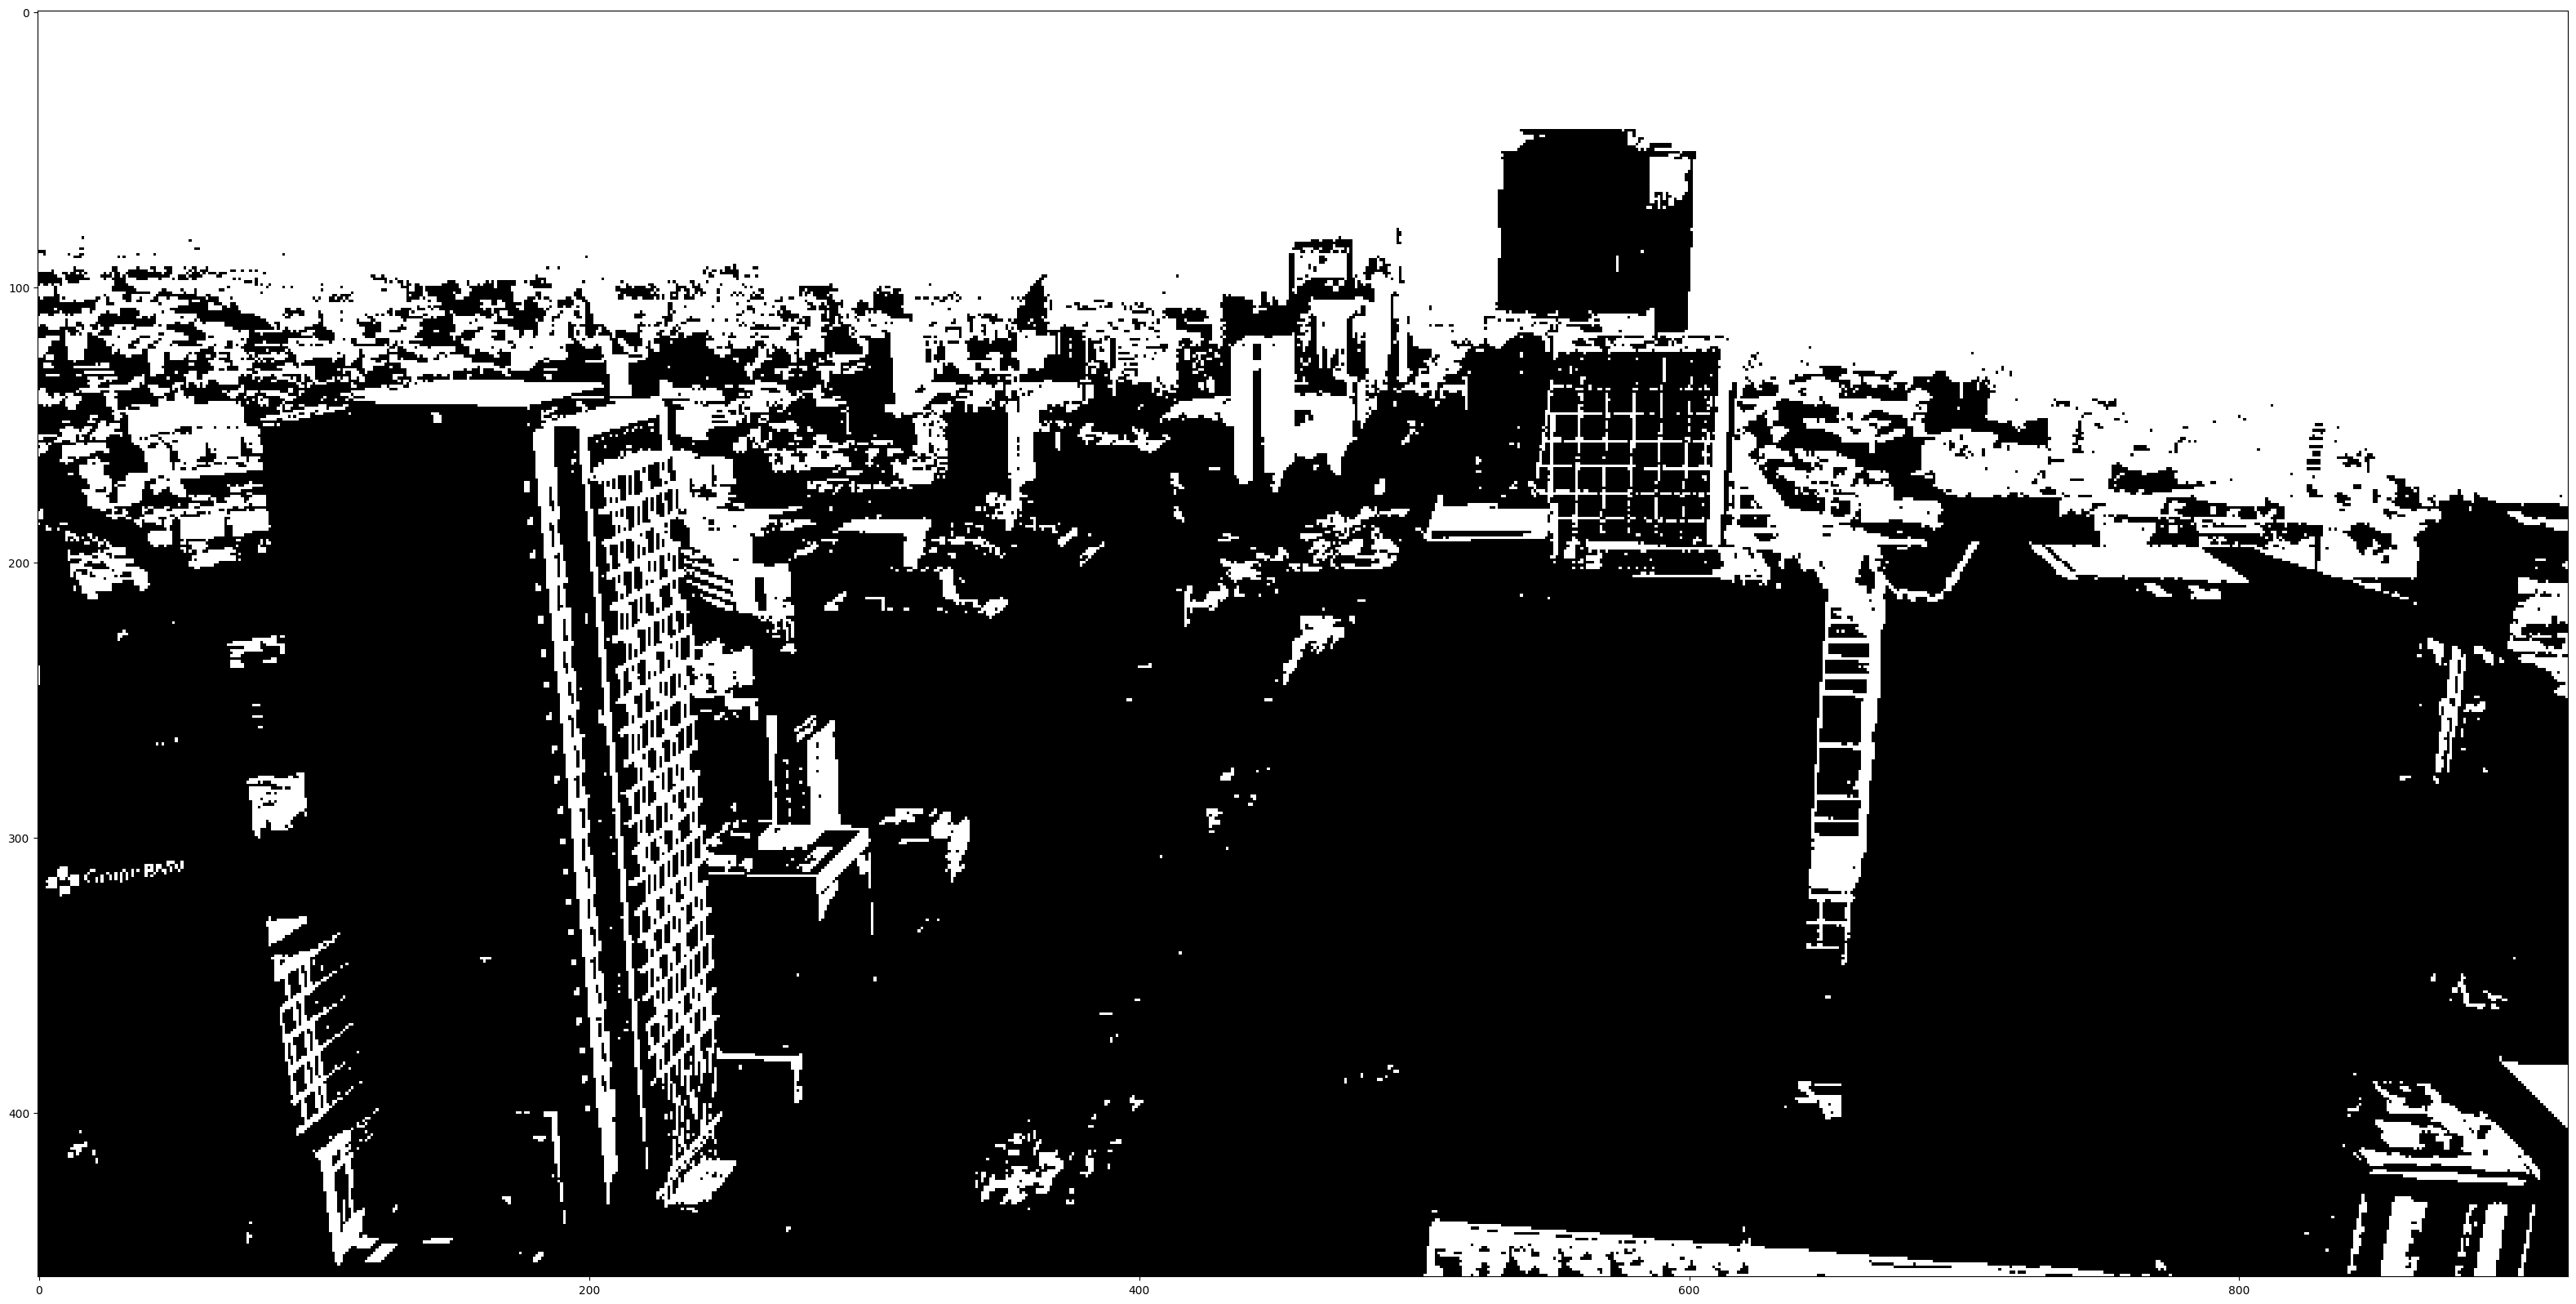

In [7]:

imgBinaria = binarizar(imagenGris, 128)
plt.figure(figsize=(40,40))
plt.imshow(imgBinaria, cmap=plt.cm.gray)

## Reducción de espacios de color
Recordemos que cada uno de los canales tiene pixeles con valores de 0 a 255, esas son $256^{3} =256 \times 256 \times 256 = 16,777,216 $ posibilidades diferentes de combinación de color.


Cuando reduces los espacios de colores a por ejemplo, 4 por canal, se transforma en 64 posibilidades, lo cual es mucho mas manejable para un clasificador.

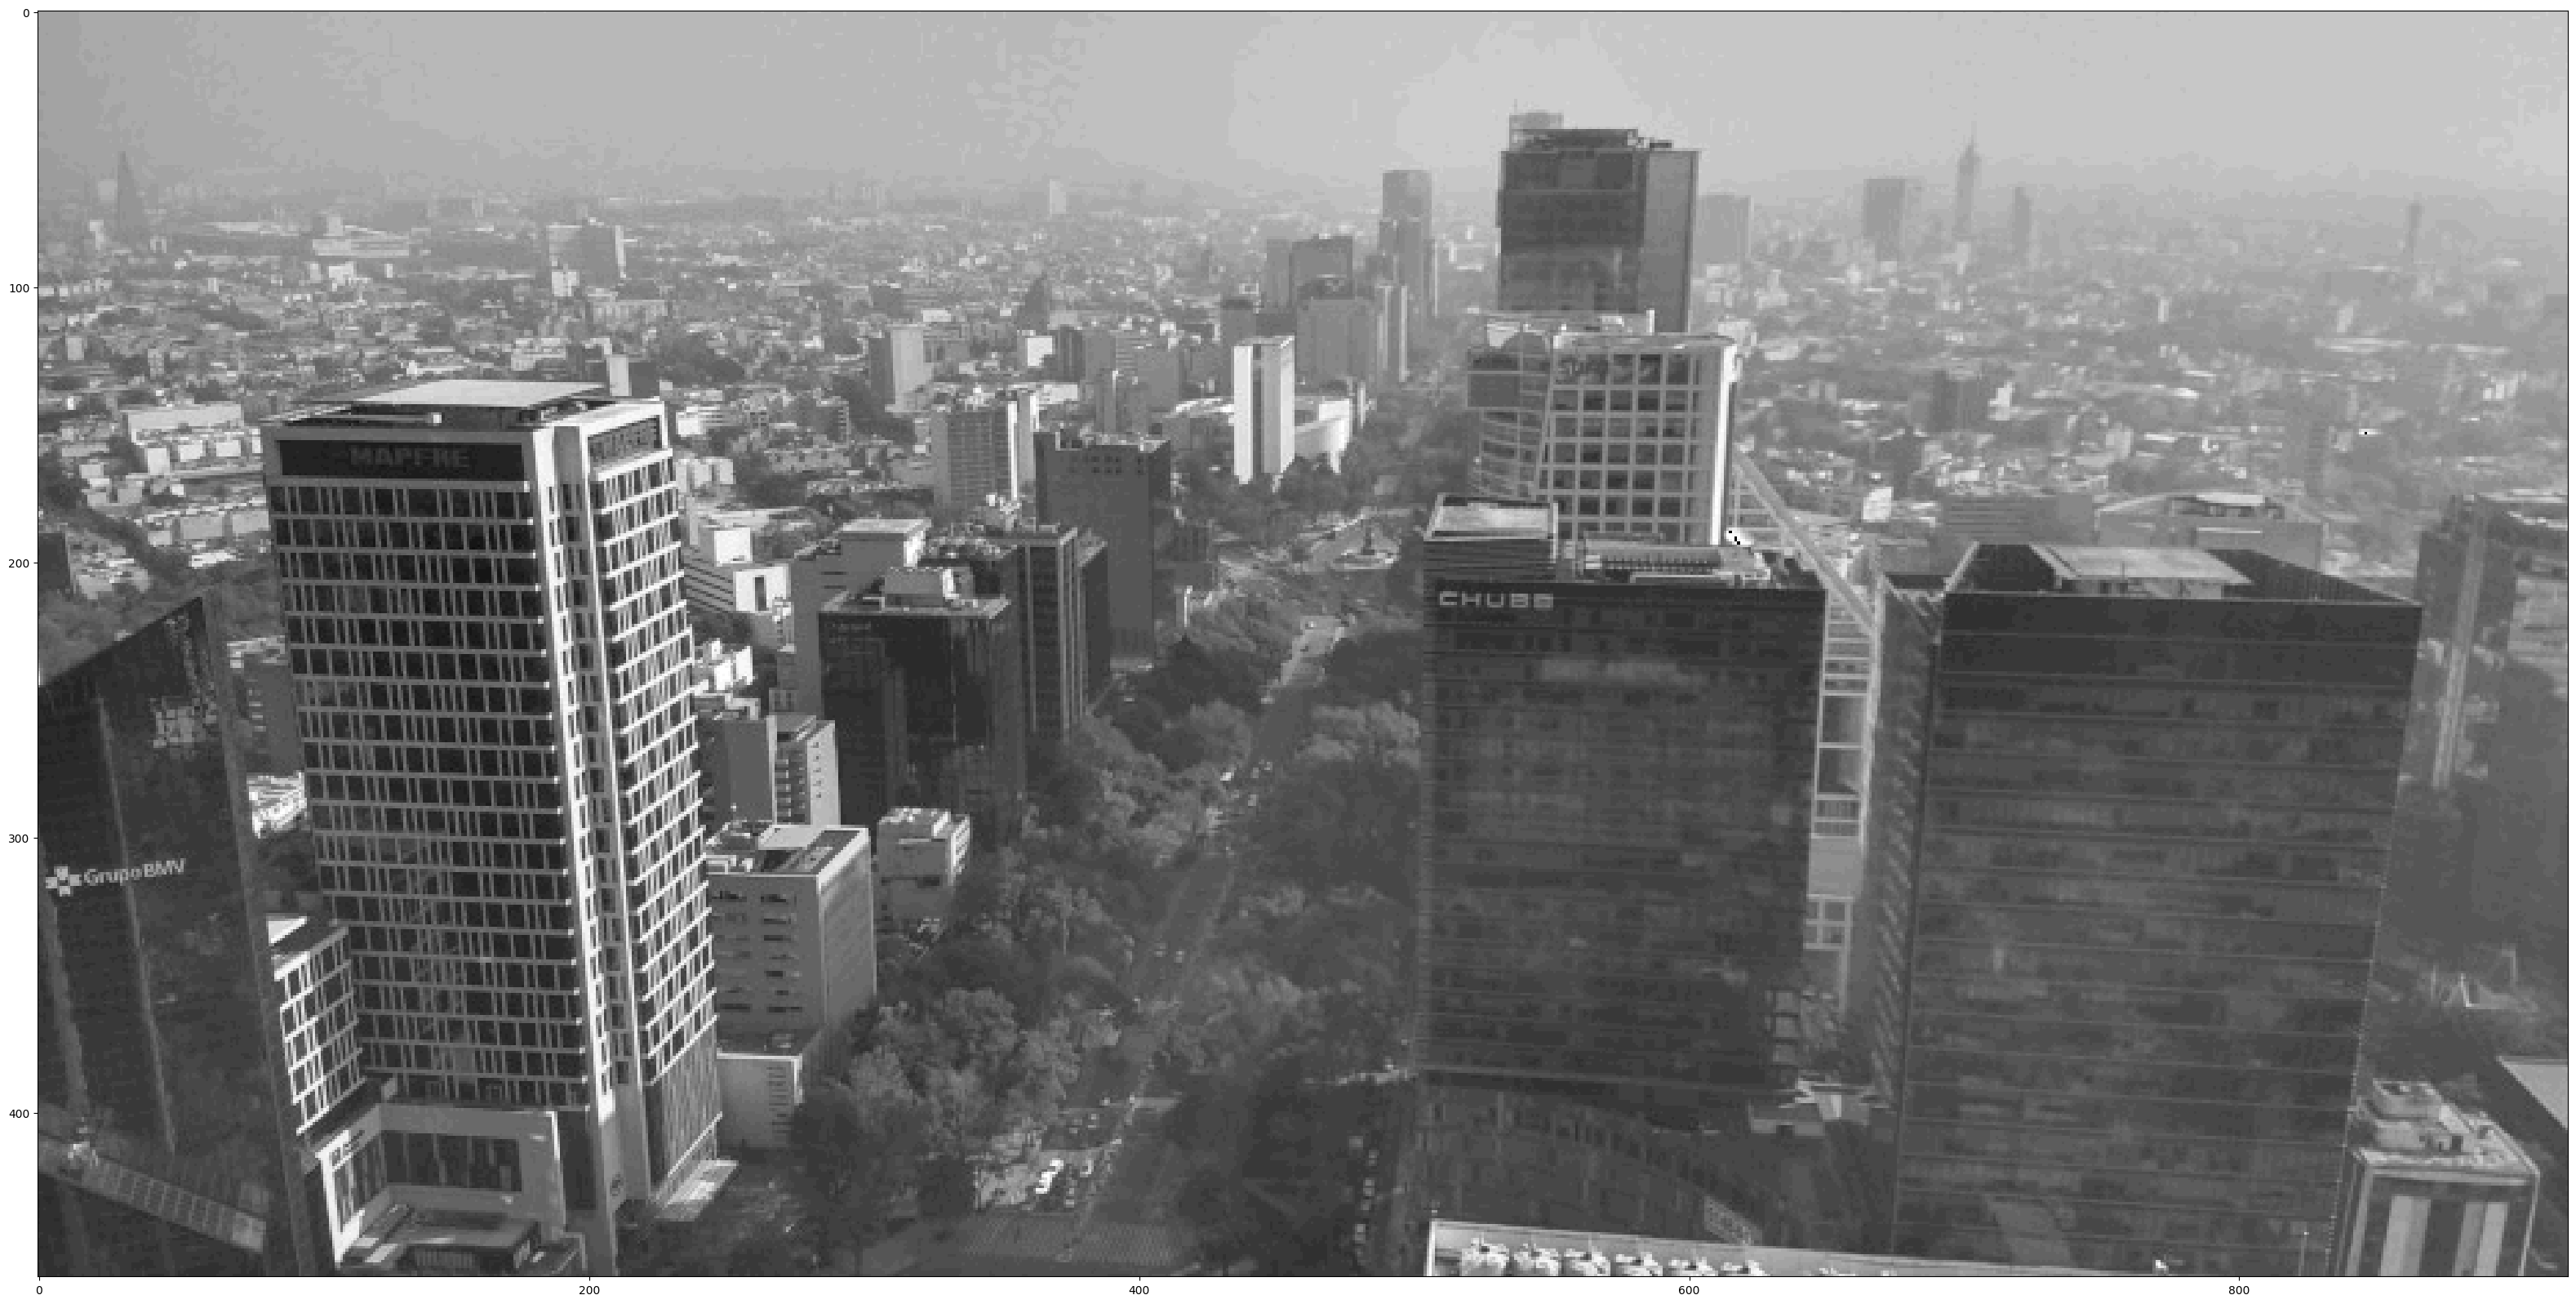

In [10]:
def reducirColores(imagenGris, cantidadDeColores):
    if(cantidadDeColores <= 0):
        return np.zeros_like(imagenGris)
    
    stepSize = int(255 / (cantidadDeColores))
    for counter in range (0, 255, stepSize):
        if(counter == 0):
            buffer = np.zeros_like(imagenGris)
        else:
            imgFiltrada = np.where(((imagenGris > (counter - stepSize)) & (imagenGris <= counter)), counter, 0)
            buffer = np.add(buffer, imgFiltrada)
    return buffer


#Edita la cantidad de colores:
imgReducida = reducirColores(imagenGris, 32)
plt.figure(figsize=(40,40))
plt.imshow(imgReducida, cmap=plt.cm.gray)

### Negativo
En algunas ocasiones, una imagen nos sirve mejor cuando se le aplica un negativo, por ejemplo: si binarizamos una imagen podemos usar el negativo para alternar entre el fondo y el objeto, dependiendo de que nos interese. Para ello, vamos a tomar la imagen binarizada que mostramos en un ejemplo anterior e invertiremos los colores. Puedes tomar una imagen en escala de grises inclusive y transformarla en negativo con la misma función.

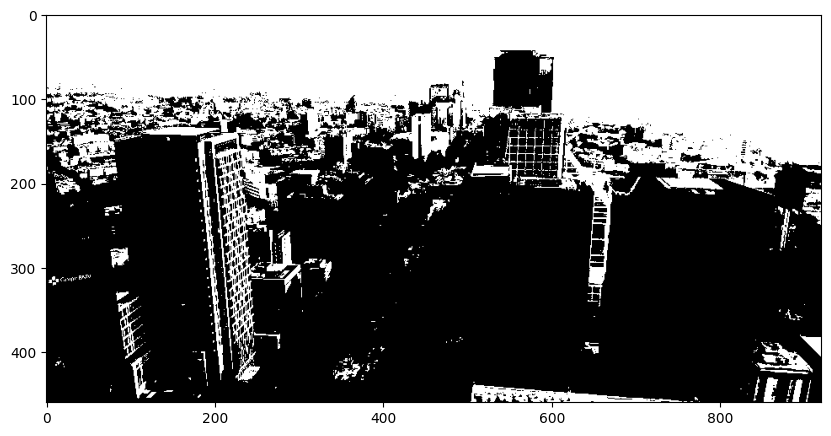

In [11]:
imgBinaria = binarizar(imagenGris, 128)
plt.figure(figsize=(10,10))
plt.imshow(imgBinaria, cmap=plt.cm.gray)

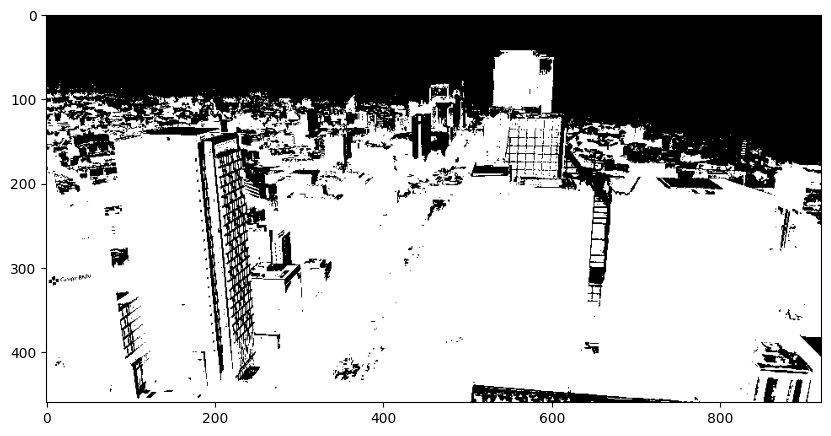

In [12]:
def obtenerNegativo(imagen):
    negativo = np.abs(imagen - 255)
    return negativo


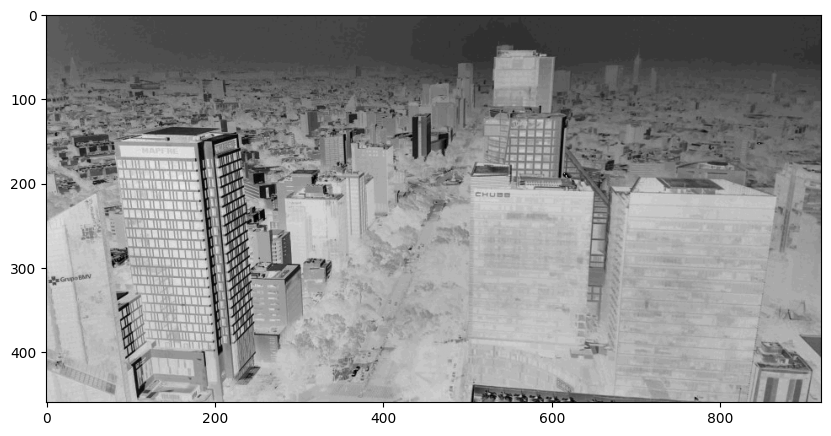

In [13]:

imgNegativa = obtenerNegativo(imgReducida)
plt.figure(figsize=(10,10))
plt.imshow(imgNegativa, cmap=plt.cm.gray)

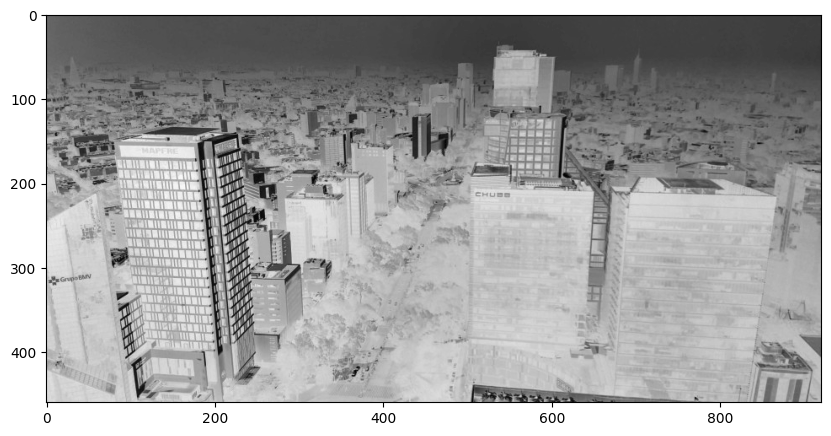

In [14]:
imgNegativa = obtenerNegativo(imagenGris)
plt.figure(figsize=(10,10))
plt.imshow(imgNegativa, cmap=plt.cm.gray)